# BNP Kaggle Data Challenge

Contact: Karen L. Smith, karen.lou.smith@gmail.com

I don't have much to say by way of introduction because this is an incomplete submission. 

I was hoping to have more time to work on it. I will keep working on it.

In [2]:
import pandas as pd
from pandas import DataFrame
import json
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
mpl.style.use('ggplot')
import seaborn as sns
sns.set(style='whitegrid',context='notebook')
%matplotlib inline
mpl.rc('font',size=12,weight='bold') #set default font size and weight for plots
import cPickle as pickle

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
#read in training data
data = pd.read_csv('/Users/Karen/Documents/Insight/data_challenges/BNP Paribas Cardif/train.csv')

In [4]:
#Let's take a quick look at the data
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [5]:
data.describe()

,ID,target,v1,v2,v4,v5,v6,v7,v8,v9,...,v121,v122,v123,v124,v126,v127,v128,v129,v130,v131
count,114321.000000,114321.000000,6.448900e+04,6.452500e+04,6.452500e+04,6.569700e+04,6.448900e+04,6.448900e+04,6.570200e+04,6.447000e+04,...,6.448100e+04,6.447000e+04,63643.000000,6.570200e+04,6.448900e+04,6.448900e+04,6.569700e+04,114321.000000,6.447800e+04,6.442600e+04
mean,114228.928228,0.761199,1.630686e+00,7.464411e+00,4.145098e+00,8.742359e+00,2.436402e+00,2.483921e+00,1.496569e+00,9.031859e+00,...,2.737596e+00,6.822439e+00,3.549938,9.198120e-01,1.672658e+00,3.239542e+00,2.030373e+00,0.310144,1.925763e+00,1.739389e+00
std,65934.487362,0.426353,1.082813e+00,2.961676e+00,1.148263e+00,2.036018e+00,5.999653e-01,5.894485e-01,2.783003e+00,1.930262e+00,...,1.356294e+00,1.795978e+00,2.604704,2.099407e+00,5.031683e-01,1.625988e+00,1.074232e+00,0.693262,1.264497e+00,1.134702e+00
min,3.000000,0.000000,-9.996497e-07,-9.817614e-07,-6.475929e-07,-5.287068e-07,-9.055091e-07,-9.468765e-07,-7.783778e-07,-9.828757e-07,...,-9.820642e-07,-9.978497e-07,0.019139,-9.994953e-07,-9.564174e-07,-9.223798e-07,8.197812e-07,0.000000,-9.901257e-07,-9.999134e-07
25%,57280.000000,1.000000,9.135798e-01,5.316428e+00,3.487398e+00,7.605918e+00,2.065064e+00,2.101477e+00,8.658986e-02,7.853659e+00,...,1.786965e+00,5.647712e+00,1.963315,2.053777e-02,1.417600e+00,2.101900e+00,1.393830e+00,0.000000,1.106172e+00,1.012658e+00
50%,114189.000000,1.000000,1.469550e+00,7.023803e+00,4.205991e+00,8.670867e+00,2.412790e+00,2.452166e+00,3.860317e-01,9.059582e+00,...,2.436195e+00,6.749117e+00,2.739239,1.398639e-01,1.614802e+00,2.963620e+00,1.798436e+00,0.000000,1.560138e+00,1.589403e+00
75%,171206.000000,1.000000,2.136128e+00,9.465497e+00,4.833250e+00,9.771353e+00,2.775285e+00,2.834285e+00,1.625246e+00,1.023256e+01,...,3.379175e+00,7.911392e+00,4.075361,8.718333e-01,1.843886e+00,4.108146e+00,2.390158e+00,0.000000,2.332425e+00,2.261905e+00
max,228713.000000,1.000000,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,2.000000e+01,...,2.000000e+01,2.000000e+01,19.686069,2.000000e+01,1.563161e+01,2.000000e+01,2.000000e+01,11.000000,2.000000e+01,2.000000e+01


In [6]:
#First, let's see if there are any duplicate IDs? No
print len(data['ID'].unique())
print 'There are no duplicate IDs'

114321
There are no duplicate IDs


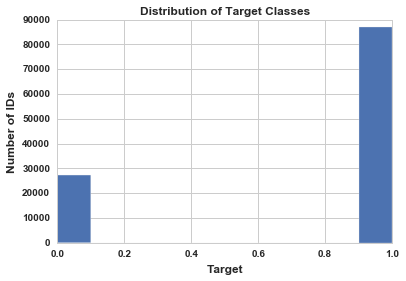

In [7]:
#Now let's quickly look at the Target classes. Is there a large class imbalance? Yes
data['target'].hist()
plt.xlabel('Target',fontsize=12,fontweight='bold')
plt.ylabel('Number of IDs',fontsize=12,fontweight='bold')
plt.title('Distribution of Target Classes',fontsize=12,fontweight='bold')

### There is a large class imbalance. We may need to consider adjusting the classification parameters once we get to the predictive modelling phase

In [9]:
#Now, let's see how many missing values are there? Many!!
print data.isnull().sum()

ID            0
target        0
v1        49832
v2        49796
v3         3457
v4        49796
v5        48624
v6        49832
v7        49832
v8        48619
v9        49851
v10          84
v11       49836
v12          86
v13       49832
v14           4
v15       49836
v16       49895
v17       49796
v18       49832
v19       49843
v20       49840
v21         611
v22         500
v23       50675
v24           0
v25       48619
v26       49832
v27       49832
v28       49832
          ...  
v102      51316
v103      49832
v104      49832
v105      48658
v106      49796
v107          3
v108      48624
v109      48624
v110          0
v111      49832
v112        382
v113      55304
v114         30
v115      49895
v116      49836
v117      48624
v118      49843
v119      50680
v120      49836
v121      49840
v122      49851
v123      50678
v124      48619
v125         77
v126      49832
v127      49832
v128      48624
v129          0
v130      49843
v131      49895
dtype: int64


### There are a lot of missing values. We will need to investigate this in detail in order to figure out the best way to impute. 

In [10]:
#What percentage of each feature is missing?
print data.isnull().sum()/len(data['ID']) * 100

ID         0.000000
target     0.000000
v1        43.589542
v2        43.558051
v3         3.023941
v4        43.558051
v5        42.532868
v6        43.589542
v7        43.589542
v8        42.528494
v9        43.606162
v10        0.073477
v11       43.593041
v12        0.075227
v13       43.589542
v14        0.003499
v15       43.593041
v16       43.644650
v17       43.558051
v18       43.589542
v19       43.599164
v20       43.596540
v21        0.534460
v22        0.437365
v23       44.326939
v24        0.000000
v25       42.528494
v26       43.589542
v27       43.589542
v28       43.589542
            ...    
v102      44.887641
v103      43.589542
v104      43.589542
v105      42.562609
v106      43.558051
v107       0.002624
v108      42.532868
v109      42.532868
v110       0.000000
v111      43.589542
v112       0.334147
v113      48.376064
v114       0.026242
v115      43.644650
v116      43.593041
v117      42.532868
v118      43.599164
v119      44.331313
v120      43.593041


In [11]:
#And how many rows would remain if we dropped all the rows with NaNs?
data2 = data.dropna().reset_index(drop=True)
from __future__ import division
print 'Only', len(data2)/len(data) * 100,'% of the data would remain if we drop all rows with NaNs.'

Only 15.5317045862 % of the data would remain if we drop all rows with NaNs.


### Excluding missing data may substantially reduce the statistical power and, if the missing data are not COMPLETELY at RANDOM, then excluding this data may bias the predition.

In [21]:
#What does the distribution of NaN's look like? Are there strong correlations across variabiles in terms of 
#missingness?
nancorr = data.iloc[:,2:].isnull().corr()

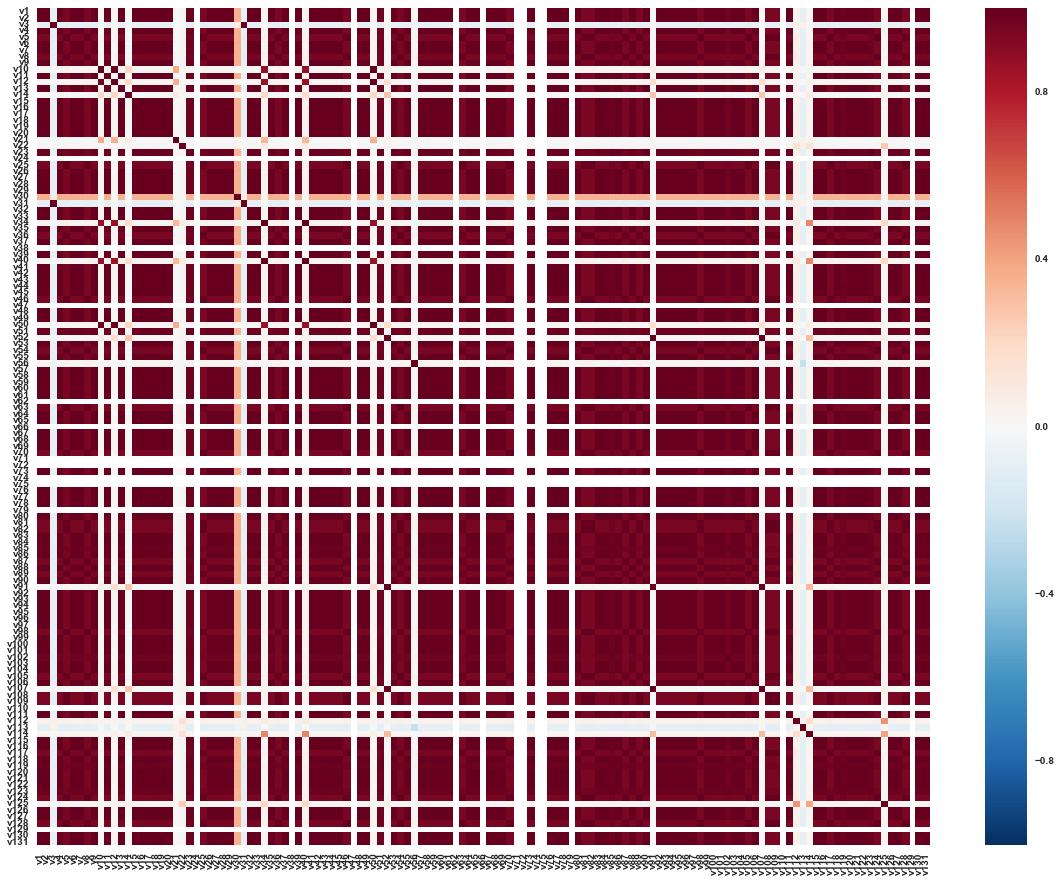

In [22]:
#Yes! There are strong correlations between missing values across different features. This suggests that the missingness
#is likely not COMPLETELY at RANDOM
plt.figure(figsize=(20,15))
sns.heatmap(nancorr)